# UBER ANALYSIS

## CONTENT

## Geography - USA, Sri lanka and Pakistan
## Time Period - Jan-Dec 2016
## Unit of Analysis - Drives
## Total Drives - 1,155
## Total miles - 12,204

## The dataset contains start date, end date, start location, end location, miles driven and purpose of driving

_______________________________________________________________________________________________________________________________

### EXTRACTING AND DISPLAYING DATA

In [2]:
# Downloading missingno library
!pip install missingno

In [3]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime,time
import missingno as msno

%matplotlib inline

In [4]:
# Reading and extracting data from csv file
df = pd.read_csv("My Uber Drives - 2016.csv")

In [5]:
# Displaying the data
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
# Removing * in column names
df.columns = df.columns.str.replace('*','')

df

<ipython-input-6-e1eff98002b2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('*','')


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [7]:
# Displaying first 5 rows
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [8]:
# Displaying last 5 rows
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [9]:
# Displaying information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [10]:
# Dimensions of data
df.shape

(1156, 7)

In [11]:
# Statistical data displayed only for columns having numeric data
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### HANDLING MISSING VALUES

In [12]:
# Counting number of null values column wise
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

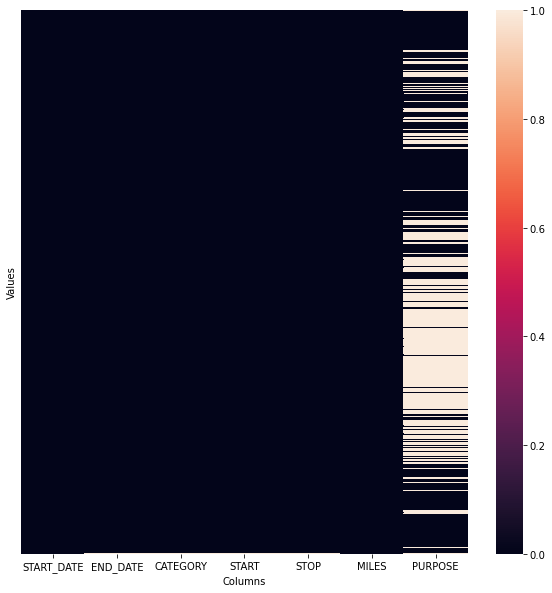

In [13]:
# Visualising number of null values using a heat map
plt.figure(figsize=(10,10))
sb.heatmap(df.isnull(),yticklabels=False)   # yticklabels=False removes scale numbers of y axis 
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

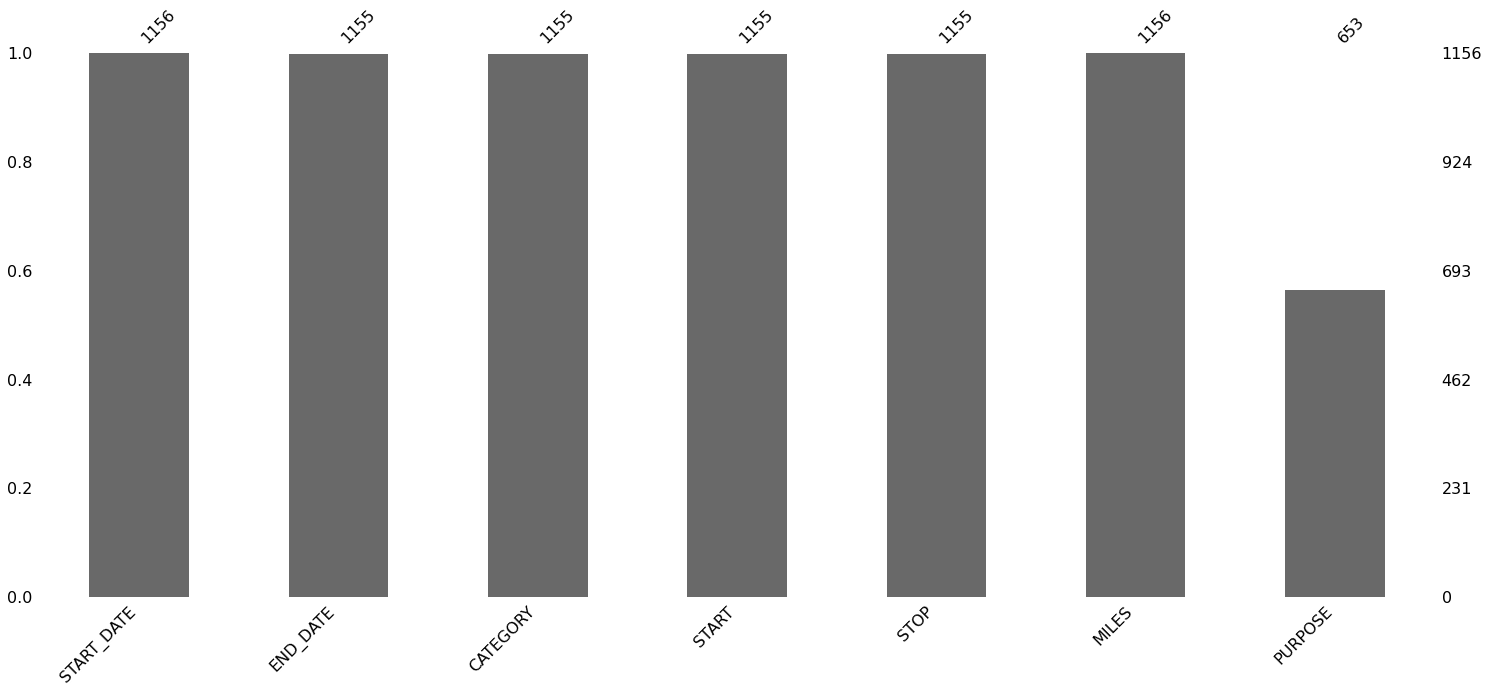

In [14]:
# Visualising null values using missingno bar
msno.bar(df)   # displays values of df as a barchart
plt.show()

In [15]:
# Display columns having null values
null_columns=df.columns[df.isnull().any()]   # returns columns having null values
df[null_columns].isnull().sum()              # returns null count per column
df[null_columns].isnull().sum().sum()        # returns total null value count   

507

In [16]:
# Drop a row as number of null values in all columns is only 1 except 'PURPOSE' column
df.drop(index=1155,axis=0,inplace=True)

In [17]:
# Now null values remain in only 1 column i.e. 'PURPOSE'
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [18]:
# Displaying percentage of null values in 'PURPOSE' column
(df['PURPOSE'].isnull().sum()/len(df))*100

43.46320346320346

In [19]:
# Forward fill to remove null values in 'PURPOSE' column
# Categorical data is present so 0s can't be used to fill NaN values
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [20]:
# All null values have been removed
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

### PROPER FORMATTING

In [21]:
# Converting 'START_DATE' and 'END_DATE' to proper date and time format
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


In [22]:
# Datatype of 'START_DATE' and 'END_DATE' now changes from object to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


### MEANINGFUL INSIGHTS FROM DATA

In [23]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


col_0     Count of travel as per category
CATEGORY                                 
Business                             1078
Personal                               77


<AxesSubplot:xlabel='CATEGORY'>

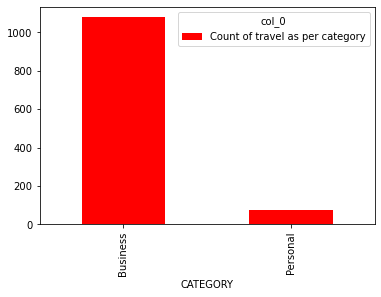

In [24]:
# Crosstable for 'CATEGORY'
category=pd.crosstab(index=df['CATEGORY'],columns='Count of travel as per category')
print(category)

# Plotting frequency barchart for the above crosstable
category.plot(kind='bar',color='red')

In [25]:
# Crosstable for 'START'
start=pd.crosstab(index=df['START'],columns='Count of travel as per starting location')
print(start)

col_0            Count of travel as per starting location
START                                                    
Agnew                                                   4
Almond                                                  1
Apex                                                   17
Arabi                                                   1
Arlington                                               1
...                                                   ...
West University                                         2
Weston                                                  2
Westpark Place                                         17
Whitebridge                                            68
Winston Salem                                           1

[177 rows x 1 columns]


C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


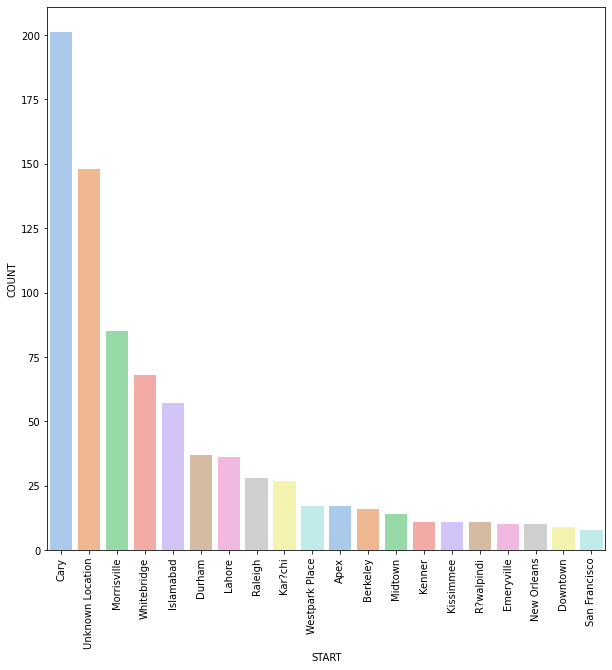

In [26]:
# Plotting bar chart for 'START' location v/s frequency

plt.figure(figsize=(10,10))
start_color=sb.color_palette("pastel")
sb.countplot(df['START'],order=df['START'].value_counts().index[:20],palette=start_color)
plt.xticks(rotation=90)
plt.ylabel('COUNT')
plt.show()

In [27]:
# Crosstable for 'STOP'
stop=pd.crosstab(index=df['STOP'],columns='Count of travel as per destination')
print(stop)

col_0               Count of travel as per destination
STOP                                                  
Agnew                                                4
Alief                                                1
Almond                                               1
Apex                                                17
Arabi                                                1
...                                                ...
Weston                                               5
Westpark Place                                      16
Whitebridge                                         65
Williamsburg Manor                                   1
Winston Salem                                        1

[188 rows x 1 columns]


C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


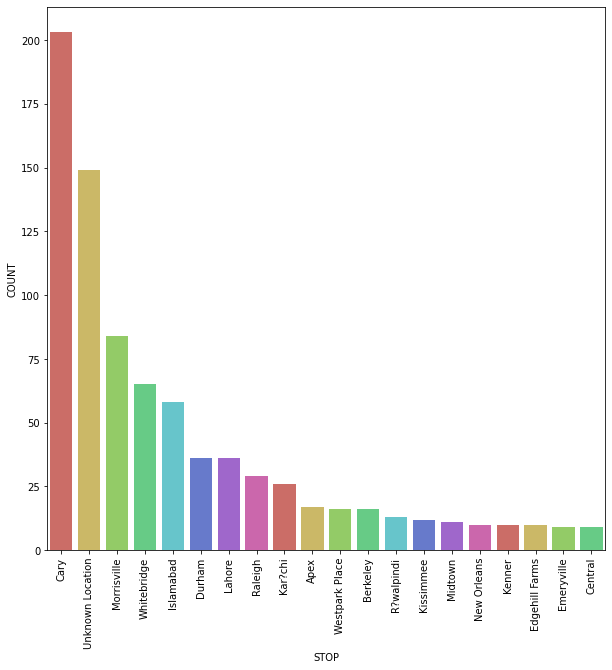

In [28]:
# Plotting bar chart for 'STOP' location v/s frequency

plt.figure(figsize=(10,10))
stop_color=sb.color_palette("hls", 8)
sb.countplot(df['STOP'],order=df['STOP'].value_counts().index[:20],palette=stop_color)
plt.xticks(rotation=90)
plt.ylabel('COUNT')
plt.show()

col_0            Count of travel as per purpose of travel
PURPOSE                                                  
Airport/Travel                                         54
Between Offices                                        18
Charity ($)                                             1
Commute                                                 1
Customer Visit                                        155
Errand/Supplies                                       173
Meal/Entertain                                        245
Meeting                                               308
Moving                                                  4
Temporary Site                                        196


<AxesSubplot:xlabel='PURPOSE'>

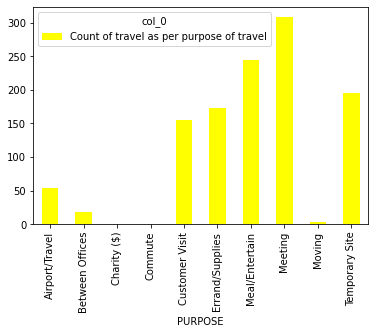

In [29]:
# Crosstable for 'PURPOSE'
purpose=pd.crosstab(index=df['PURPOSE'],columns='Count of travel as per purpose of travel')
print(purpose)

# Plotting frequency barchart for the above crosstable
purpose.plot(kind='bar',color='yellow')

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
                      ... 
Columbia Heights         1
Mebane                   1
Pontchartrain Beach      1
Ingleside                1
Bellevue                 1
Name: START, Length: 177, dtype: int64


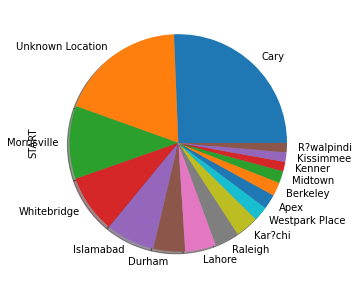

In [30]:
# Plotting value_counts() of 'START'
start_point=df['START'].value_counts()
print(start_point)

plt.figure(figsize=(5,5))
start_point[start_point>10].plot(kind='pie',shadow=True)
plt.show()

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
                   ... 
Lower Manhattan       1
Bay Farm Island       1
Sugar Land            1
Ridgeland             1
Bellevue              1
Name: STOP, Length: 188, dtype: int64


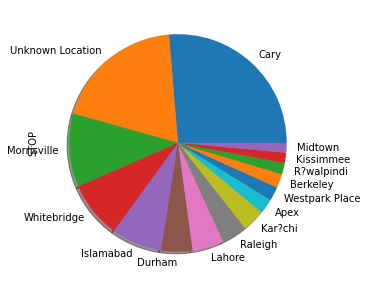

In [31]:
# Plotting value_counts() of 'STOP'
stop_point=df['STOP'].value_counts()
print(stop_point)

plt.figure(figsize=(5,5))
stop_point[stop_point>10].plot(kind='pie',shadow=True)
plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


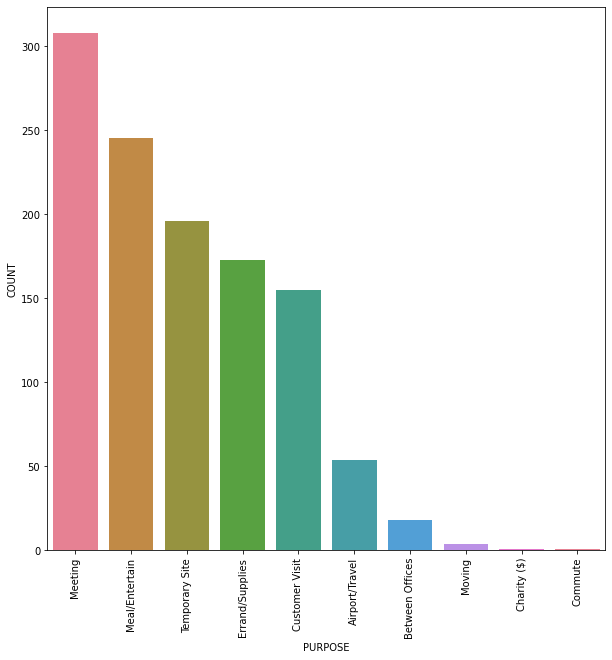

In [32]:
# Barchart for 'PURPOSE' column data

plt.figure(figsize=(10,10))
base_color=sb.color_palette("husl", 9)
sb.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index,palette=base_color)
plt.xticks(rotation=90)
plt.ylabel('COUNT')
plt.show()

In [33]:
# Mean , Max and Min miles covered based on purpose
statistics=pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean().round(1),
                         'Max':df.groupby(['PURPOSE'])['MILES'].max(),
                         'Min':df.groupby(['PURPOSE'])['MILES'].min()})
statistics

,Mean,Max,Min
PURPOSE,,,
Airport/Travel,15.0,156.9,0.9
Between Offices,10.9,39.2,1.9
Charity ($),15.1,15.1,15.1
Commute,180.2,180.2,180.2
Customer Visit,16.1,310.3,0.6
Errand/Supplies,5.9,195.3,0.5
Meal/Entertain,5.8,36.5,0.6
Meeting,12.7,201.0,0.7
Moving,4.6,6.1,3.3


In [34]:
# Calculating duration of cab ride
df['DURATION']=df.END_DATE-df.START_DATE
df['DURATION']=df['DURATION'].dt.total_seconds()/60;    # Calculates total time in seconds and converts to minutes ( / 60)
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

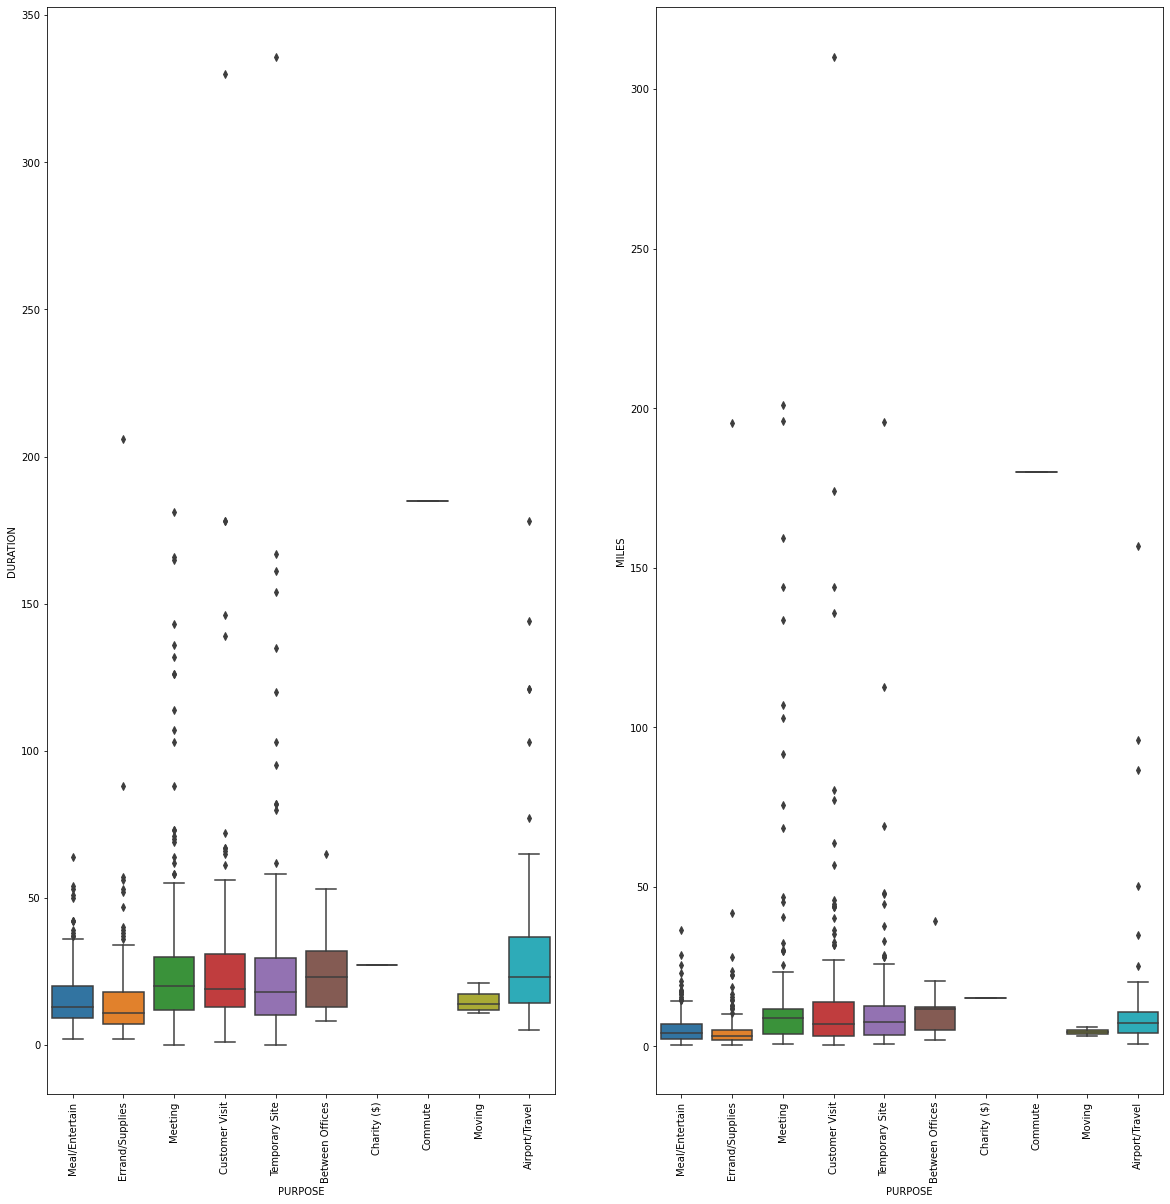

In [35]:
# Box Plot of 'PURPOSE' v/s 'DURATION'
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)  # Subplot number-1
sb.boxplot(data=df,x=df['PURPOSE'],y=df['DURATION'])
plt.xticks(rotation=90)

# Box Plot of 'PURPOSE' v/s 'MILES'

plt.subplot(1,2,2)  # Subplot number-2
sb.boxplot(data=df,x=df['PURPOSE'],y=df['MILES'])
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

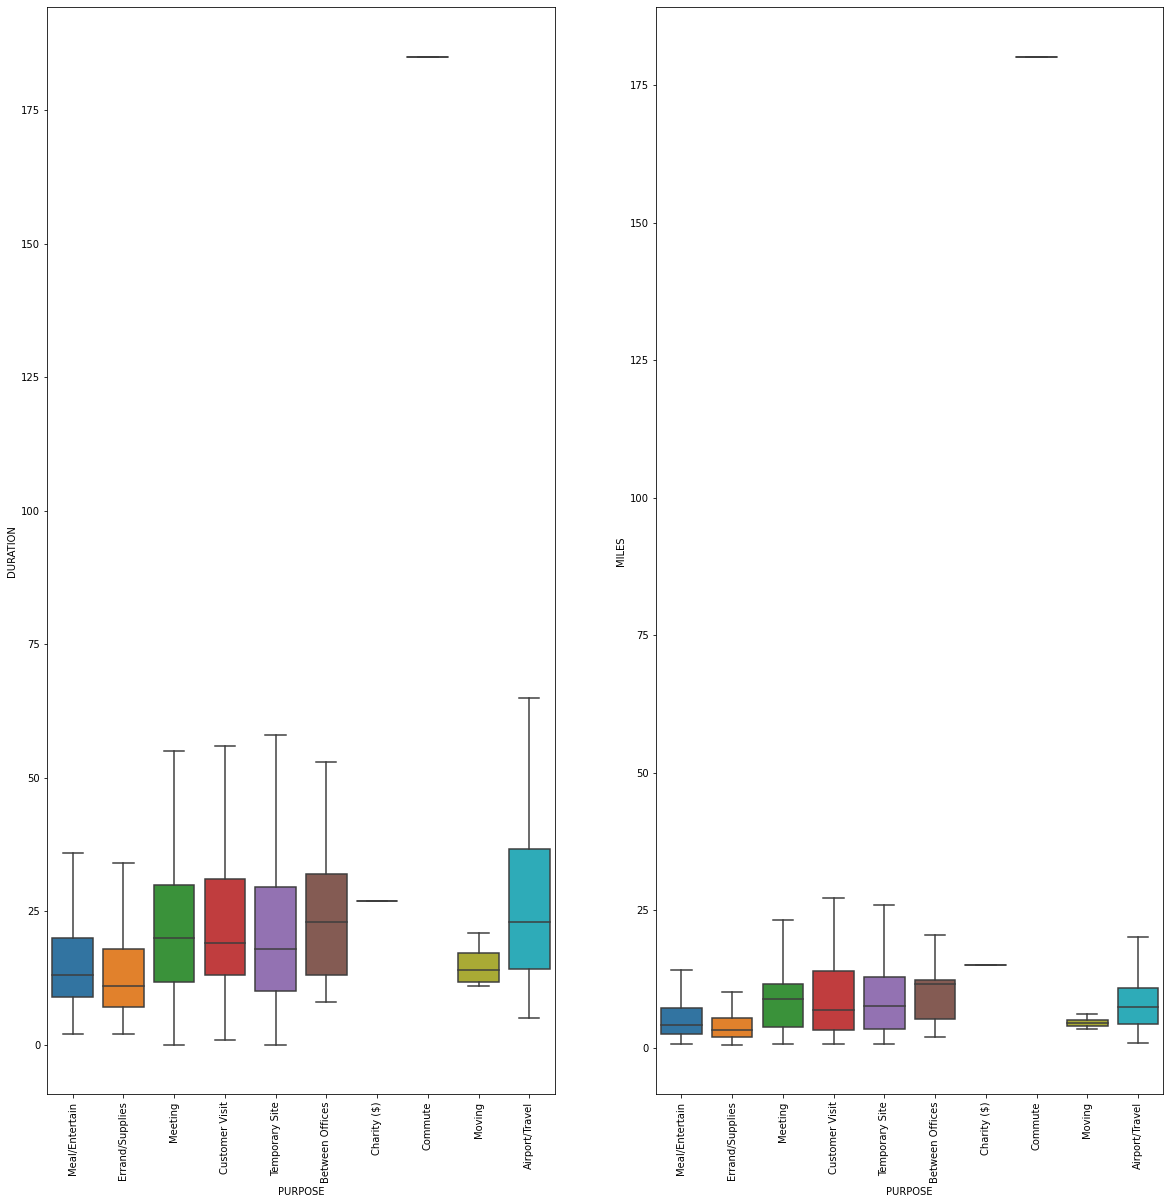

In [36]:
# Box Plot without outliers

# Box Plot of 'PURPOSE' v/s 'DURATION'
plt.figure(figsize=(20,20))

plt.subplot(1,2,1)  # Subplot number-1
sb.boxplot(data=df,x=df['PURPOSE'],y=df['DURATION'],showfliers=False)
plt.xticks(rotation=90)

# Box Plot of 'PURPOSE' v/s 'MILES'

plt.subplot(1,2,2)  # Subplot number-2
sb.boxplot(data=df,x=df['PURPOSE'],y=df['MILES'],showfliers=False)
plt.xticks(rotation=90)

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


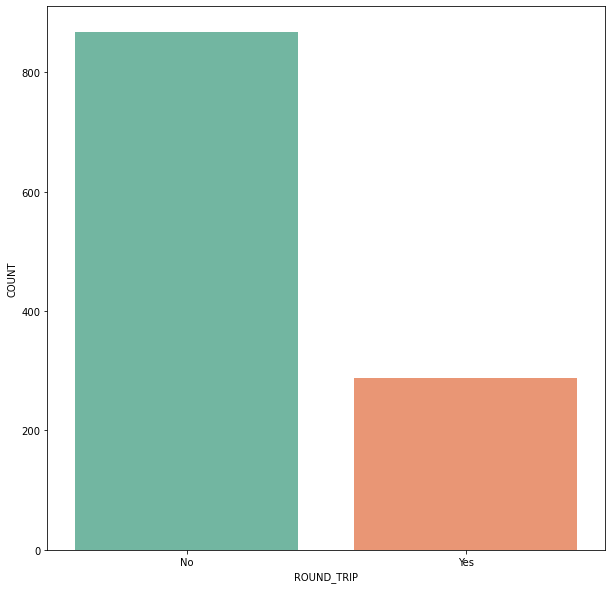

In [37]:
# Round trips (Start location is same as stop location)

def round(x):   # Function that checks whether trip is round trip or not
    if x['START']==x['STOP']:
        return 'Yes'
    else:
        return 'No'
    
df['ROUND_TRIP']=df.apply(round,axis=1)  # Apply round function and make a new column

# Plot 'ROUND_TRIP' v/s frequency

plt.figure(figsize=(10,10))
round_palette=sb.color_palette("Set2")
sb.countplot(df['ROUND_TRIP'],order=df['ROUND_TRIP'].value_counts().index,palette=round_palette)
plt.ylabel('COUNT')
plt.show()

In [38]:
# Creating new column having month names

months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',
        11:'November',12:'December'}

df['MONTH']=pd.DatetimeIndex(df['START_DATE']).month  # Extracting month number from 'START_DATE'
df['MONTH']=df['MONTH'].map(months)  # Replacing month number with month names using 'months' dictionary

df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,DURATION,ROUND_TRIP,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,Yes,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,Yes,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,Yes,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,Yes,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,No,January


C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


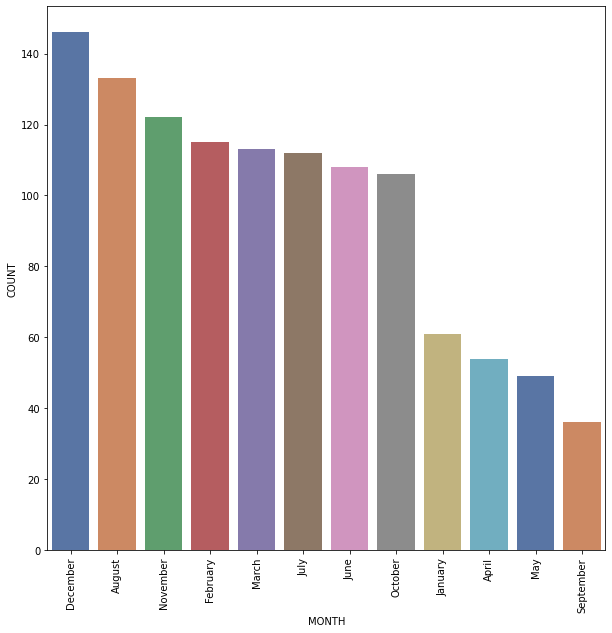

In [39]:
# Plot 'MONTH' v/s frequency of trips against it

plt.figure(figsize=(10,10))
sb.countplot(df['MONTH'],order=df['MONTH'].value_counts().index,palette='deep')
plt.ylabel('COUNT')
plt.xticks(rotation=90)
plt.show()

C:\Users\Arunima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


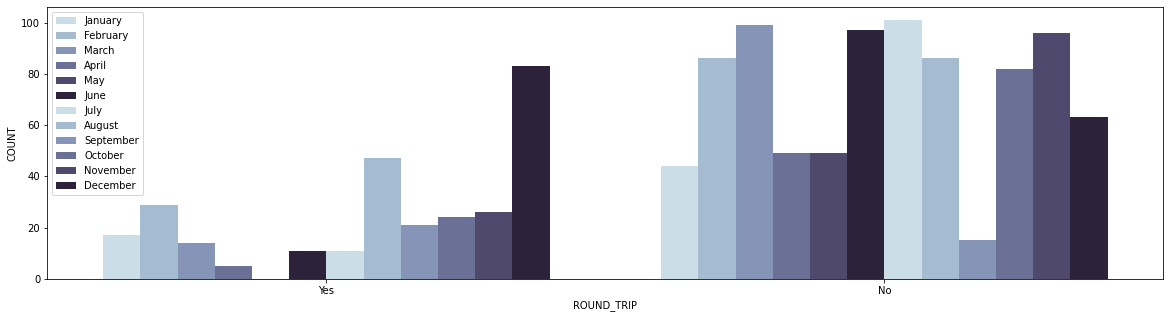

In [40]:
# Plot 'ROUND_TRIP' month-wise v/s frequency plot

plt.figure(figsize=(20,5))
round_month=sb.color_palette("ch:s=.25,rot=-.25",)
sb.countplot(df['ROUND_TRIP'],hue=df['MONTH'],palette=round_month)
plt.legend()
plt.ylabel('COUNT')
plt.show()

<AxesSubplot:xlabel='MILES', ylabel='DURATION'>

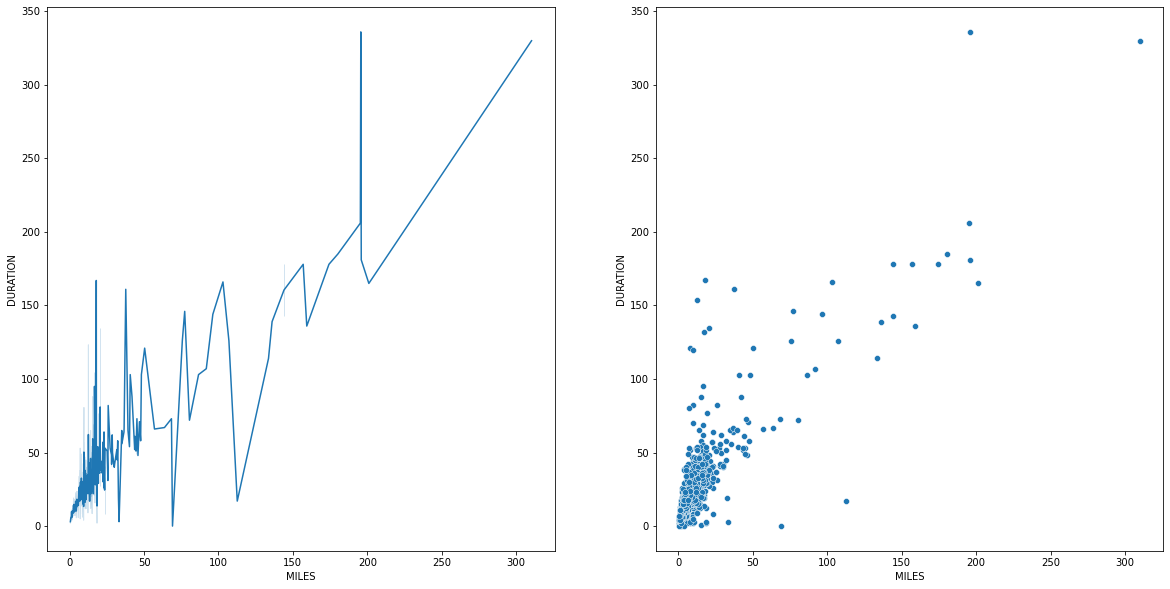

In [44]:
# Plot 'MILES' v/s 'DURATION' using line plot and scatter plot

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sb.lineplot(data=df,x='MILES',y='DURATION')

plt.subplot(1,2,2)
sb.scatterplot(data=df,x='MILES',y='DURATION')

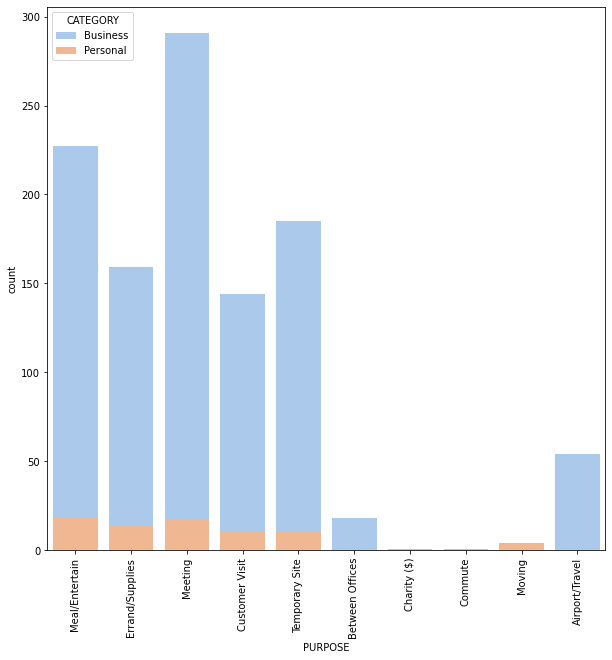

In [48]:
# Plot cab rides based on 'CATEGORY'

plt.figure(figsize=(10,10))
rides_color=sb.color_palette('pastel')
sb.countplot(data=df,x='PURPOSE',hue='CATEGORY',dodge=False,palette=rides_color) # dodge combines both the bars on top of one another
plt.xticks(rotation=90)
plt.show()

_______________________________________________________________________________________________________________________________

## CONCLUSION

### 1. Business cabs were used more in number and also for longer distances
### 2. Round trips were made mostly in December
### 3. December can prove to be best month for earning profits by raising fare as demand is more
### 4. Cab traffic is high in 5 cities only
### 5. Mostly cabs travelled for 30 miles taking about 30-35 minutes
### 6. Airport cabs took more time than usual